# Data Wrangling - WeRateDogs Twitter Data

In [1]:
import pandas as pd 
import numpy as np
import json
import requests
import tweepy 
import os

## Gather Data
1. The WeRateDogs Twitter archive.
2. The tweet image predictions from Udcaity servers.
3. The retweet count and faorite count from tweepy API

In [2]:
# 1. Read the WeRateDogs Twitter archive as DataFrame
df_tweets = pd.read_csv("twitter-archive-enhanced.csv")

In [ ]:
# 2. Download the tweet image predictions from Udcaity servers.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join("image_predictions.tsv"), mode = 'wb') as file:
    file.write(response.content)

In [3]:
# Read the image predictions as DataFrame
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')

In [ ]:
# 3. Get the retweet count and faorite count from tweepy API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [ ]:
# Write API data to tweet_json.txt file
count = 0
with open(os.path.join("tweet_json.txt"), mode = 'w', encoding="utf8") as file:
    for t_id in df_tweets["tweet_id"]:
        try:
            file.writelines(json.dumps(api.get_status(t_id, tweet_mode='extended')._json) + "\n")
            count = count +1
            print(str(count) + ": The id is " + str(t_id))
        except: # catch exceptions
            print(str(count) + ": There is no id for " + str(t_id))

In [4]:
# Load json data from tweet_json.txt
with open('tweet_json.txt', encoding="utf8") as f:
    all_json = [json.loads(line) for line in f]

In [5]:
# Get tweet_id, retweet_count, favorite_count and make a DataFrame
df_tweets_api = pd.DataFrame({
    'id' : list(map(lambda json: json['id'] , all_json)),
    'retweet_count' : list(map(lambda json: json['retweet_count'] , all_json)),
    'favorite_count' : list(map(lambda json: json['favorite_count'] , all_json))
})

## Assess Data
#### `df_tweets` DataFrame Analysis

In [6]:
# Assess the dw_tweets visually
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Note:
1. There are retweet data that starts with **RT** in `text` column
2. Odd dog `name` with **a**
3. Empty `expanded_urls`
4. None for NaN value

In [7]:
# Assess the df_tweets programmatically
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Note:
 1. `rating_numerator` and `rating_denominator` have too large max value
 2. `timestampe` might need to change data type

In [9]:
df_tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
df_tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
# Check recordes with rating denominator not equals to 10
pd.set_option('display.max_colwidth', -1)
df_tweets[df_tweets['rating_denominator'] > 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]

,tweet_id,text,rating_numerator,rating_denominator,name
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None


In [12]:
# Check recordes with rating numerator are not in normal range
df_tweets[(df_tweets['rating_numerator'] > 20) | (df_tweets['rating_numerator'] < 10)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']]

,tweet_id,text,rating_numerator,rating_denominator,name
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,None
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,None
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10,Jerry
290,838150277551247360,@markhoppus 182/10,182,10,None
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,None
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,Logan
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None


Note:
1. Some `rating_numerator` values are wrong when encountering decimal values. 
2. Sometimes there are multiple matches for Number/Number in the text.
3. Some numerators are not 10.

In [13]:
df_tweets['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

Note:
 - The rating_numerator and rating_denominator in `df_tweets` should have further look afterwards. 

In [14]:
len(df_tweets[df_tweets.duplicated()])

0

`df_tweets` has no duplicate records

#### `df_image` DataFrame Analysis

In [15]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True
135,668496999348633600,https://pbs.twimg.com/media/CUb6ebKWcAAJkd0.jpg,1,Staffordshire_bullterrier,0.412879,True,miniature_pinscher,0.161488,True,American_Staffordshire_terrier,0.112495,True
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
1092,719551379208073216,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1,malamute,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True


In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
len(df_image[df_image.duplicated()])

0

In [18]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
#df_image[df_image['p1_dog'] == True]['p1'].value_counts()

In [ ]:
#df_image[(df_image['p1_dog'] == False) & (df_image['p2_dog'] == True)]['p2'].value_counts()

In [ ]:
#df_image[(df_image['p1_dog'] == False) & (df_image['p2_dog'] == False) & (df_image['p3_dog'] == True)]['p3'].value_counts()

#### `df_tweets_api` DataFrame Analysis

In [19]:
df_tweets_api.sample(20)

,id,retweet_count,favorite_count
18,888554962724278272,3554,19741
85,875747767867523072,4293,25044
1918,674024893172875264,1298,1855
1427,696877980375769088,772,2591
2275,667174963120574464,84,251
1517,690015576308211712,803,2668
28,886366144734445568,3186,21039
29,886267009285017600,4,116
870,760252756032651264,949,4225
1709,680100725817409536,1484,3789


In [20]:
df_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [21]:
len(df_tweets_api[df_tweets_api.duplicated()])

0

#### Quality 
##### `df_tweets` DataFrame
- Retweet data shouldn't be included
- Incorrect `rating_numerator` and `rating_denominator`
- **Doggo, floofer, pupper, puppo** columns should have NaN, not None when it is null
- Inaccurate dog **name**: such, quite, an, a
- Dog **name** should have NaN rather than None when it is null
- Timestamp column should be datetime type
- Missing **expanded_urls** (2,297 instead of 2,356)

##### `df_image` DataFrame
- Missing records (2,075 instead of 2,356)
- **p1, p2, p3** should have consistent capitalization

##### `df_tweets_api` DataFrame
- Missing records (2,343 instead of 2,356)

#### Tidiness
- The prediction of `df_image` DataFrame should be part of the tweets table
- Favorite count and retweet count in `df_tweets_api` DataFrame should be part of the tweets table
- **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp** should be removed since they are for retweet info
- **Doggo, floofer, pupper, puppo** columns should combine into one column **dog_stage**
- **Timestamp** could have extra columns **year, month, weekofDay** to analyze post trends in different time period

## Clean

In [22]:
df_tweets_copy = df_tweets.copy()
df_image_copy = df_image.copy()
df_tweets_api_copy = df_tweets_api.copy()

### Tidiness
1. `df_image` and `df_tweets_api` DataFrame should be part of the `df_tweets` DataFrame
2. Drop extra retweet columns
3. Drop extra dog stage columns

##### Define
1. Merge `df_tweets`, `df_image` and `df_tweets_api` on same tweet id.
2. Drop extra id column
3. Drop columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp** 
4. Combine **Doggo, floofer, pupper, puppo** columns into one column **dog_stage**

##### Code

In [23]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

In [24]:
# Extract dog stage from text
df_tweets_copy['dog_stage'] = df_tweets_copy['text'].str.lower().str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [25]:
# Drop extra columns
df_tweets_copy = df_tweets_copy.drop(
    ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
     'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [26]:
df_tweets_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
696,786664955043049472,NaN,NaN,2016-10-13 20:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",https://twitter.com/dog_rates/status/786664955043049472/photo/1,12,10,None,NaN
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,https://twitter.com/dog_rates/status/677644091929329666/video/1,11,10,a,NaN
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX,https://twitter.com/dog_rates/status/807010152071229440/photo/1,12,10,Lennon,pupper
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you keepin the popcorn bucket in your lap and she reach for some... 10/10 https://t.co/a1IrjaID3X,https://twitter.com/dog_rates/status/693622659251335168/photo/1,10,10,None,NaN
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just wants to say hello. 11/10 would knock down fence for https://t.co/A8X8fwS78x,"https://twitter.com/dog_rates/status/688916208532455424/photo/1,https://twitter.com/dog_rates/status/688916208532455424/photo/1",11,10,None,pupper
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rumble, but he's not ready to. Would rather fall asleep in his bath bucket. 13/10 would attempt a boop without waking https://t.co/MVQCzrF1g9","https://twitter.com/dog_rates/status/870308999962521604/photo/1,https://twitter.com/dog_rates/status/870308999962521604/photo/1",13,10,Rumble,NaN
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Reagan. He's a Persnicketus Derpson. Great with kids. Permanently caught off guard. 8/10 https://t.co/A2j2StfNgL,"https://twitter.com/dog_rates/status/699079609774645248/photo/1,https://twitter.com/dog_rates/status/699079609774645248/photo/1,https://twitter.com/dog_rates/status/699079609774645248/photo/1,https://twitter.com/dog_rates/status/699079609774645248/photo/1",8,10,Reagan,NaN
1454,695446424020918272,NaN,NaN,2016-02-05 03:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate unicorns but this one has 3 ears so it must be super rare. 12/10 majestic af https://t.co/f9qlKiv39T,https://twitter.com/dog_rates/status/695446424020918272/photo/1,12,10,None,NaN
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 12/10 would dry https://t.co/yUM8jYStuG,https://twitter.com/dog_rates/status/822975315408461824/photo/1,12,10,Albus,NaN
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,NaN


In [27]:
df_tweets_copy['dog_stage'].value_counts()

pupper     276
doggo      100
puppo      38 
floofer    9  
Name: dog_stage, dtype: int64

In [28]:
# Merge three tables on same id
df_clean = pd.merge(df_tweets_copy, df_tweets_api_copy, left_on='tweet_id', right_on='id', how='inner')
df_clean = pd.merge(df_clean, df_image_copy, on='tweet_id', how='inner')

In [29]:
# Drop extra id column
df_clean = df_clean.drop(['id'], axis = 1)

##### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 2067 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2067 non-null object
source                   2067 non-null object
text                     2067 non-null object
expanded_urls            2067 non-null object
rating_numerator         2067 non-null int64
rating_denominator       2067 non-null int64
name                     2067 non-null object
dog_stage                356 non-null object
retweet_count            2067 non-null int64
favorite_count           2067 non-null int64
jpg_url                  2067 non-null object
img_num                  2067 non-null int64
p1                       2067 non-null object
p1_conf                  2067 non-null float64
p1_dog                   2067 non-null bool
p2                       2067 non-null object
p2_conf                  2067

After merging the tables, we got 2068 records and it solves the original missing records issue.
1. `df_image` had missing records (2,075 instead of 2,356)
2. `df_tweets_api` had missing records (2,343 instead of 2,356)

#### Split timestamp to year, month, day of week

##### Define
1. Change timestamp datatype 
2. create new columns year, month, day of week

In [31]:
# Convert Object type to datetime type
df_clean['timestamp'] =  pd.to_datetime(df_clean['timestamp'], format='%Y%m%d %H:%M:%S')

In [32]:
# Get year, month and dayOfWeek from timestamp and store in new columns
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['dow'] = df_clean['timestamp'].dt.dayofweek
df_clean['hour'] = df_clean['timestamp'].dt.hour

##### Test

In [33]:
df_clean.groupby(["year", "month"]).size()

year  month
2015  11       298
      12       367
2016  1        169
      2        111
      3        121
      4        54 
      5        57 
      6        81 
      7        93 
      8        63 
      9        71 
      10       71 
      11       68 
      12       61 
2017  1        77 
      2        68 
      3        51 
      4        44 
      5        45 
      6        45 
      7        50 
      8        2  
dtype: int64

In [34]:
df_clean['year'].value_counts()

2016    1020
2015    665 
2017    382 
Name: year, dtype: int64

In [35]:
# Sunday = 0
df_clean['dow'].value_counts()

0    339
2    312
1    310
4    293
3    291
5    261
6    261
Name: dow, dtype: int64

In [36]:
df_clean['hour'].value_counts()

1     294
0     261
2     222
16    196
3     178
17    163
23    111
18    103
4     96 
15    92 
19    86 
20    80 
21    76 
22    70 
5     26 
14    8  
6     3  
13    2  
Name: hour, dtype: int64

### Quality
#### Issue1: Extra Data
`df_tweets`: Extra retweet records

##### Define
1. Filter out the retweet data from `df_clean` DataFrame 

##### Code

In [37]:
# Exclude retweet data from DataFrame df_tweets_copy
df_clean = df_clean[~df_clean['text'].map(lambda txt: txt.lstrip().startswith("RT"))]

##### Test

In [38]:
# Confirm retweet data is gone
len(df_clean[df_clean['text'].map(lambda txt: txt.lstrip().startswith("RT"))])

0

In [39]:
len(df_clean)

1992

####  Issue2: Missing Data

`df_tweets`: **expanded_urls** (2,297 instead of 2,356) 

##### Define
Make sure `df_tweets_api_copy` DataFrame has all 1,992 tweets ID in `df_tweets_copy`


##### Code

In [40]:
sum(df_clean['expanded_urls'].isnull())

0

##### Test
There is no missing `expanded_urls` after combinning datasets.

####  Issue3: Wrong dog names

##### Define
Get correct dog names

##### Code

In [41]:
# Check dog name with non-capitalized texts
df_clean[df_clean['name'].str.contains('^[a-z]\w*')][['tweet_id', 'text', 'name']]

,tweet_id,text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
50,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
139,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
153,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
289,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
434,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
519,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
642,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
657,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very
685,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my


From the observation, I found some texts have "named" or "name is" that could be useful to extract the correct names.

In [42]:
# Get dog name from texts that have "named"
ix_named = df_clean['text'].str.contains('named')
df_clean.loc[ix_named, 'name'] = df_clean[ix_named]['text'].str.extract('named\s([A-Z]\w+)', expand = False)

In [43]:
# Get dog name from texts that have "name is"
ix_name_is = df_clean['text'].str.contains('name is')
df_clean.loc[ix_name_is, 'name'] = df_clean[ix_name_is]['text'].str.extract('name\sis\s([A-Z]\w+)', expand = False)

In [44]:
# Set dog name to NaN if name is not start with capitalized character or name is None
ix_nan = df_clean['name'].str.contains('^[a-z]\w*|None')
df_clean.loc[ix_nan, 'name'] = np.NaN

##### Test

In [45]:
# Make sure name is NaN when no name mentioned in the text
df_clean[['tweet_id', 'text', 'name']]

,tweet_id,text,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie


####  Issue 4: Some decimal ratings are not correct

##### Define
Correct the decimal rating

##### Code

In [46]:
# Use regex to get decimal rating
df_clean['new_rating'] = df_clean['text'].str.extract('(\d+\.?\d*\/\d*\.?\d+)', expand=True)

##### Test

In [47]:
df_clean['new_rating'].value_counts()

12/10       449
10/10       418
11/10       396
13/10       261
9/10        150
8/10        95 
7/10        51 
14/10       35 
5/10        32 
6/10        32 
3/10        19 
4/10        15 
2/10        9  
1/10        4  
0/10        2  
45/50       1  
84/70       1  
13.5/10     1  
50/50       1  
88/80       1  
204/170     1  
60/50       1  
9/11        1  
44/40       1  
165/150     1  
80/80       1  
99/90       1  
1776/10     1  
11.27/10    1  
144/120     1  
420/10      1  
24/7        1  
7/11        1  
9.75/10     1  
143/130     1  
121/110     1  
1/2         1  
4/20        1  
11.26/10    1  
Name: new_rating, dtype: int64

####  Issue 5: Multiple matches for fraction

##### Define
Get correct rating from multiple matches

##### Code

In [48]:
# Get dataframe that only have multiple matches
df_multi_match = df_clean[df_clean['text'].str.contains(r'(\d+\.?\d*\/\d*\.?\d+.+\d+\.?\d*\/\d*\.?\d+)')]

C:\Users\yeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [49]:
df_multi_match = df_multi_match[['tweet_id', 'text', 'new_rating']]

In [50]:
# import the re library to get multiple matches for same index
import re
pat = re.compile("(?P<new_rating1>\d+\.?\d*\/\d*\.?\d+)")
df_multi_match['text'].str.extractall(pat).reset_index('match', drop=True)

,new_rating1
611,12/10
611,11/10
819,10/10
819,7/10
870,9/11
870,14/10
961,4/20
961,13/10
995,50/50
995,11/10


In [51]:
# Reshape the dataframe to have multiple rating columns for same record

df_multi_match = pd.concat([
    df_multi_match,
    (
        df_multi_match['text'].str.extractall(pat)
          .reset_index('match')          
    )
], axis=1).fillna('')

df_multi_match = df_multi_match[df_multi_match['match'] == 1].drop(['match'], axis = 1)
df_multi_match

,tweet_id,text,new_rating,new_rating1
611,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12/10,11/10
819,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10/10,7/10
870,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9/11,14/10
961,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4/20,13/10
995,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50/50,11/10
1011,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10/10,8/10
1133,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9/10,2/10
1223,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4/10,13/10
1228,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10/10,5/10
1263,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5/10,10/10


In [52]:
# function to get right rating into new_rating column
def getRightRating(ix_list, columnName):
    for i in ix_list:
        ix = df_multi_match.index == i
        df_multi_match.loc[ix, 'new_rating'] = df_multi_match.loc[ix, columnName]

In [53]:
# According to observation, some records have more than one dog rating and the first one will be used for now
# Some records have multiple matches but should only have one rating. 
# If new_rating1 value is correct, new_rating will be reokaced by new_rating1
getRightRating([870, 961, 995, 1399, 2046], 'new_rating1')

In [54]:
df_multi_match

,tweet_id,text,new_rating,new_rating1
611,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12/10,11/10
819,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10/10,7/10
870,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14/10,14/10
961,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13/10,13/10
995,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11/10,11/10
1011,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10/10,8/10
1133,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9/10,2/10
1223,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4/10,13/10
1228,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10/10,5/10
1263,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5/10,10/10


In [55]:
# replace the df_clean DataFrame by the df_multi_match DataFrame for correct rating
ix_multi = df_clean['text'].str.contains(r'(\d+\.?\d*\/\d*\.?\d+.+\d+\.?\d*\/\d*\.?\d+)')
df_clean.loc[ix_multi, 'new_rating'] = df_multi_match[ix_multi]['new_rating']

C:\Users\yeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\yeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# Make sure df_clean DataFrame is replaced by correct ratings
df_clean.loc[ix_multi, 'new_rating']

611     12/10
819     10/10
870     14/10
961     13/10
995     11/10
1011    10/10
1133    9/10 
1223    4/10 
1228    10/10
1263    5/10 
1289    11/10
1399    10/10
1521    10/10
1555    10/10
1617    10/10
1621    5/10 
1686    8/10 
1726    10/10
1779    11/10
1828    11/10
1891    10/10
1928    8/10 
1975    10/10
1984    7/10 
2017    10/10
2046    9/10 
Name: new_rating, dtype: object

In [57]:
# Split new_rating to numerator and denomator
df_clean['rating_numerator'] = list(map(lambda x: x.split('/')[0], df_clean['new_rating']))
df_clean['rating_denominator'] = list(map(lambda x: x.split('/')[1], df_clean['new_rating']))
df_clean = df_clean.drop('new_rating', axis =1)

In [58]:
df_clean['rating_numerator'] =  pd.to_numeric(df_clean['rating_numerator'], errors='coerce')
df_clean['rating_denominator'] =  pd.to_numeric(df_clean['rating_denominator'], errors='coerce')

##### Test

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null float64
rating_denominator       1992 non-null int64
name                     1378 non-null object
dog_stage                342 non-null object
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf            

In [60]:
df_clean['rating_numerator'].value_counts()

12.00      449
10.00      419
11.00      397
13.00      262
9.00       151
8.00       95 
7.00       51 
14.00      36 
6.00       32 
5.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
0.00       2  
44.00      1  
24.00      1  
121.00     1  
99.00      1  
13.50      1  
1776.00    1  
11.27      1  
165.00     1  
84.00      1  
9.75       1  
60.00      1  
11.26      1  
88.00      1  
144.00     1  
420.00     1  
204.00     1  
80.00      1  
45.00      1  
143.00     1  
Name: rating_numerator, dtype: int64

In [61]:
df_clean['rating_denominator'].value_counts()

10     1979
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
7      1   
Name: rating_denominator, dtype: int64

####  Issue 6: Rating denominator not equal to 10

##### Define
Make sure the rating is correct even though the denominator is not 10

##### Code

In [62]:
df_clean[df_clean['rating_denominator'] != 10][['tweet_id', 'text', 'rating_denominator']]

,tweet_id,text,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
411,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
729,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
918,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1016,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1041,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1059,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1125,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1201,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
1373,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",130


Note:
 1. Only ID 810984652412424192 has no rating, it will be dropped.

In [63]:
# There is no rating in index 411 record, so drop it 
df_clean = df_clean.drop(df_clean[df_clean['tweet_id'] == 810984652412424192].index)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2066
Data columns (total 28 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null float64
rating_denominator       1991 non-null int64
name                     1377 non-null object
dog_stage                342 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf            

####  Issue 7: P1, P2, P3 should have consistent capitalization

##### Define
Transform non-capitalized values

##### Code

In [64]:
df_clean['p1'] = df_clean['p1'].str.capitalize()
df_clean['p2'] = df_clean['p2'].str.capitalize()
df_clean['p3'] = df_clean['p3'].str.capitalize()

##### Test

In [65]:
df_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper_towel,Labrador_retriever,Spatula
4,Basset,English_springer,German_short-haired_pointer
5,Chesapeake_bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,Ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_bay_retriever
9,Pembroke,Cardigan,Chihuahua


In [ ]:
# Create the twitter_archive_master.csv
df_clean.to_csv("twitter_archive_master.csv")

## Visualizing

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

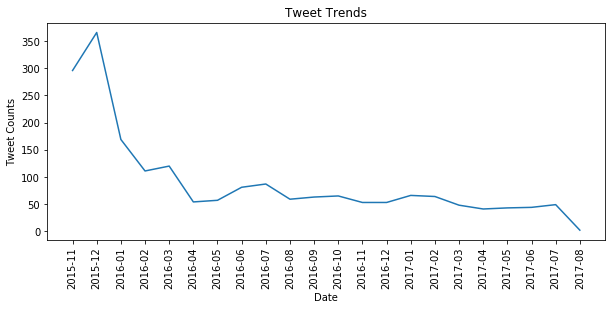

In [67]:
df_postTrend = df_clean.groupby(["year", "month"]).size()
ax_postTrend = df_postTrend.plot(figsize=(10,4))
ax_postTrend.set_title("Tweet Trends")
ax_postTrend.set_xlabel("Date")
ax_postTrend.set_ylabel("Tweet Counts")
ax_postTrend.set_xticks(range(len(df_postTrend)))
ax_postTrend.set_xticklabels(["%s-%02d" % item for item in df_postTrend.index.tolist()], rotation=90);

First, I want to see the general engagement for the WeRateDogs. The line chart indicates that the tweet numbers are decreasing as time passes. Since the final tidy dataset only includes tweets with complete information like image prediction and favorite counts, it's hard to tell if the overall engagemnt is decreasing. However, if the twtiier user WeRateDogs wants to improve its community, the user might take a look if its
 1. Overall engagement is decreasing 
 2. Posts are lack of rating information

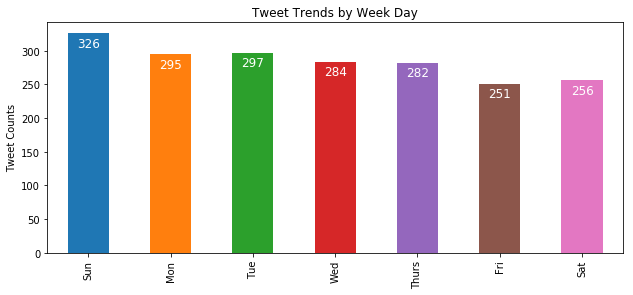

In [71]:
df_weekDayTrend = df_clean['dow'].value_counts().sort_index()
fig_weekDay = plt.figure()
ax_weekDay = fig_weekDay.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax_weekDay = df_weekDayTrend.plot(kind = "bar", figsize=(10,4))
ax_weekDay.set_title("Tweet Trends by Week Day")
ax_weekDay.set_ylabel("Tweet Counts")
ax_weekDay.set_xticks(range(len(df_weekDayTrend)))
ax_weekDay.set_xticklabels(["Sun","Mon","Tue","Wed","Thurs","Fri","Sat"], rotation=90);
for p in ax_weekDay.patches:
    ax_weekDay.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, -10),
                textcoords='offset points')

Second, there is a different tweet trend among the week days. In general, it has the largest tweet number on Sunday and similar patter from Monday to Thursday. Then, the tweet number will drop around 10% ((282-251)/282) on Friday. The reason might be that people do other things rather than pay attention on social media on Friday and Saturday. Yet, for some reasons, people turn attention to tweets again on Sunday, which leads to around a 27% jump ((326-256)/256).

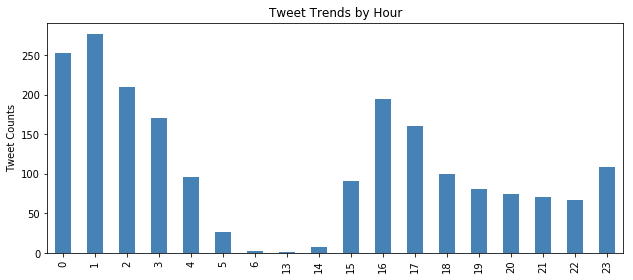

In [72]:
df_hourTrend = df_clean['hour'].value_counts().sort_index()
fig_hour = plt.figure()
ax_hour = fig_hour.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax_hour = df_hourTrend.plot(kind = "bar", figsize=(10,4), color = 'steelblue')
ax_hour.set_title("Tweet Trends by Hour")
ax_hour.set_ylabel("Tweet Counts")
ax_hour.set_xticks(range(len(df_hourTrend)))
ax_hour.set_xticklabels(df_hourTrend.index, rotation=90);

Third, there are two peaks in a day to tweet, one is at 1AM while another one is at 4PM. People usually tweet during the mid night or in the afternoon. The reason might be that people are busier in the day time and can seldom do the tweets.

Text(0,0.5,'Retweet Count')

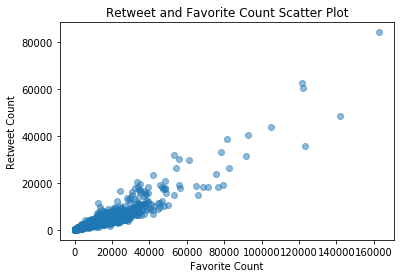

In [73]:
plt.scatter(df_clean['favorite_count'], df_clean['retweet_count'], alpha = 0.5)
plt.title("Retweet and Favorite Count Scatter Plot")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")

In [74]:
# Get the correlation between favorite count and retweet count
np.corrcoef(df_clean['favorite_count'], df_clean['retweet_count'])[0][1]

0.9276108885185818

As the favorite count increases, the retweet count normally increases as well. The correlation between the two variables is very high as 0.927

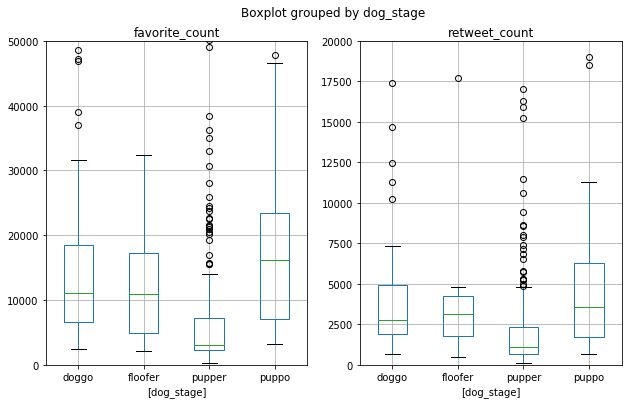

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
df_clean[df_clean['dog_stage'] != 'None'].boxplot(column = ['favorite_count'], by = ['dog_stage'], ax= axes[0])
axes[0].set_ylim(0, 50000)

df_clean[df_clean['dog_stage'] != 'None'].boxplot(column = ['retweet_count'], by = ['dog_stage'], ax= axes[1])
axes[1].set_ylim(0, 20000);

Puppo has the biggest variation of favorite and retweet counts among the stages, but it normally gets the most attention. On the other hand, pupper has the smallest variation of favorite and retweet counts, but it gets less attention by people.